## importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## importing dataset

In [14]:
dts = pd.read_csv('solarpowergeneration.csv')
dts.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [15]:
X = dts.iloc[:, :-1].values
y = dts.iloc[:, -1].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

In [16]:
X

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [17]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

## Splitting Training and Test sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (3159, 20) (3159, 1) 
Test Shape: (1054, 20) (1054, 1)


## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

In [20]:
X_train

array([[-0.15688663, -0.65066193,  0.32458773, ..., -1.17016507,
         0.20906612,  0.23973116],
       [-0.96299273,  1.26236489, -0.09488224, ...,  0.21285162,
         1.10270022, -0.59126299],
       [-0.01104135, -0.22554486, -1.44007902, ..., -0.78166945,
        -1.98808451, -0.32872643],
       ...,
       [ 0.08053592, -0.39559169, -0.65899702, ..., -1.39867408,
        -1.07235309, -0.0910784 ],
       [ 0.34283131, -0.90573217,  0.59941288, ..., -0.46582577,
         0.41541699,  0.76311909],
       [-0.6893915 ,  0.62468928,  1.45281728, ...,  0.28508139,
         0.20437129, -0.90996355]])

In [21]:
X_test

array([[ 0.34735364, -1.37336095,  0.58494839, ..., -0.78124559,
        -0.35197112,  0.78338018],
       [-1.93190285,  1.68748196, -0.84703527, ...,  0.34119265,
         1.11388012, -0.66875224],
       [-0.95055631,  0.28459563,  0.97548939, ...,  0.32973403,
        -0.38653881, -1.09819031],
       ...,
       [ 0.69783455, -1.37336095,  1.09120525, ..., -0.47407508,
         0.36095606,  0.77638555],
       [-0.00991077, -1.6709429 ,  1.93014517, ..., -1.21521633,
         0.12748879,  0.27526625],
       [-0.58537781,  1.00729465, -1.0640025 , ...,  0.07094803,
         0.619908  , -0.66549089]])

In [22]:
y_train

array([[ 0.37304328],
       [-0.96068338],
       [ 0.56242648],
       ...,
       [ 1.74385844],
       [-0.58299753],
       [-0.14116491]])

## Creating Neural Network

### defining accuracy function

In [23]:
def create_spfnet(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))
  
  model.add(Dense(1))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


In [24]:
spfnet = create_spfnet([32, 64], 'relu', 'normal')
spfnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                672       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2849 (11.13 KB)
Trainable params: 2849 (11.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
hist = spfnet.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=100, verbose=2)

Epoch 1/100
99/99 - 2s - loss: 0.4634 - root_mean_squared_error: 0.6807 - val_loss: 0.2715 - val_root_mean_squared_error: 0.5211 - 2s/epoch - 15ms/step
Epoch 2/100
99/99 - 0s - loss: 0.2490 - root_mean_squared_error: 0.4990 - val_loss: 0.2484 - val_root_mean_squared_error: 0.4984 - 480ms/epoch - 5ms/step
Epoch 3/100
99/99 - 1s - loss: 0.2377 - root_mean_squared_error: 0.4876 - val_loss: 0.2420 - val_root_mean_squared_error: 0.4919 - 529ms/epoch - 5ms/step
Epoch 4/100
99/99 - 1s - loss: 0.2355 - root_mean_squared_error: 0.4852 - val_loss: 0.2463 - val_root_mean_squared_error: 0.4963 - 508ms/epoch - 5ms/step
Epoch 5/100
99/99 - 0s - loss: 0.2288 - root_mean_squared_error: 0.4783 - val_loss: 0.2457 - val_root_mean_squared_error: 0.4956 - 441ms/epoch - 4ms/step
Epoch 6/100
99/99 - 0s - loss: 0.2229 - root_mean_squared_error: 0.4721 - val_loss: 0.2337 - val_root_mean_squared_error: 0.4835 - 496ms/epoch - 5ms/step
Epoch 7/100
99/99 - 1s - loss: 0.2187 - root_mean_squared_error: 0.4677 - val_

Epoch 54/100
99/99 - 1s - loss: 0.1417 - root_mean_squared_error: 0.3764 - val_loss: 0.2270 - val_root_mean_squared_error: 0.4765 - 578ms/epoch - 6ms/step
Epoch 55/100
99/99 - 1s - loss: 0.1372 - root_mean_squared_error: 0.3704 - val_loss: 0.2149 - val_root_mean_squared_error: 0.4636 - 548ms/epoch - 6ms/step
Epoch 56/100
99/99 - 1s - loss: 0.1363 - root_mean_squared_error: 0.3692 - val_loss: 0.2177 - val_root_mean_squared_error: 0.4666 - 557ms/epoch - 6ms/step
Epoch 57/100
99/99 - 1s - loss: 0.1385 - root_mean_squared_error: 0.3722 - val_loss: 0.2145 - val_root_mean_squared_error: 0.4632 - 510ms/epoch - 5ms/step
Epoch 58/100
99/99 - 1s - loss: 0.1320 - root_mean_squared_error: 0.3633 - val_loss: 0.2249 - val_root_mean_squared_error: 0.4742 - 557ms/epoch - 6ms/step
Epoch 59/100
99/99 - 1s - loss: 0.1345 - root_mean_squared_error: 0.3667 - val_loss: 0.2184 - val_root_mean_squared_error: 0.4674 - 579ms/epoch - 6ms/step
Epoch 60/100
99/99 - 1s - loss: 0.1331 - root_mean_squared_error: 0.36

In [26]:
spfnet.evaluate(X_train, y_train)

99/99 [==============================] - 0s 3ms/step - loss: 0.0995 - root_mean_squared_error: 0.3154


[0.09948252886533737, 0.31540849804878235]

In [27]:
from sklearn.metrics import mean_squared_error

y_pred = spfnet.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

33/33 [==============================] - 0s 2ms/step


425.4855582359546

In [28]:
train_pred = spfnet.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

99/99 [==============================] - 0s 2ms/step


294.9016283903955

In [29]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7704127559000434

In [30]:
r2_score(train_pred_orig, y_train_orig)

0.8855904151187508

In [31]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[1170.19421387, 1485.1517    ],
       [ 283.53781128,  238.13972   ],
       [1280.9979248 , 1662.2218    ],
       ...,
       [2620.28466797, 2766.8408    ],
       [1030.69396973,  591.26963   ],
       [1312.72485352, 1004.3757    ]])

In [32]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[2710.94262695, 2511.2375    ],
       [ 276.00106812,  480.20512   ],
       [1992.38867188, 2017.5687    ],
       ...,
       [ 804.03137207,  523.50056   ],
       [2444.30053711, 2506.2019    ],
       [ 822.2322998 ,  484.93113   ]])

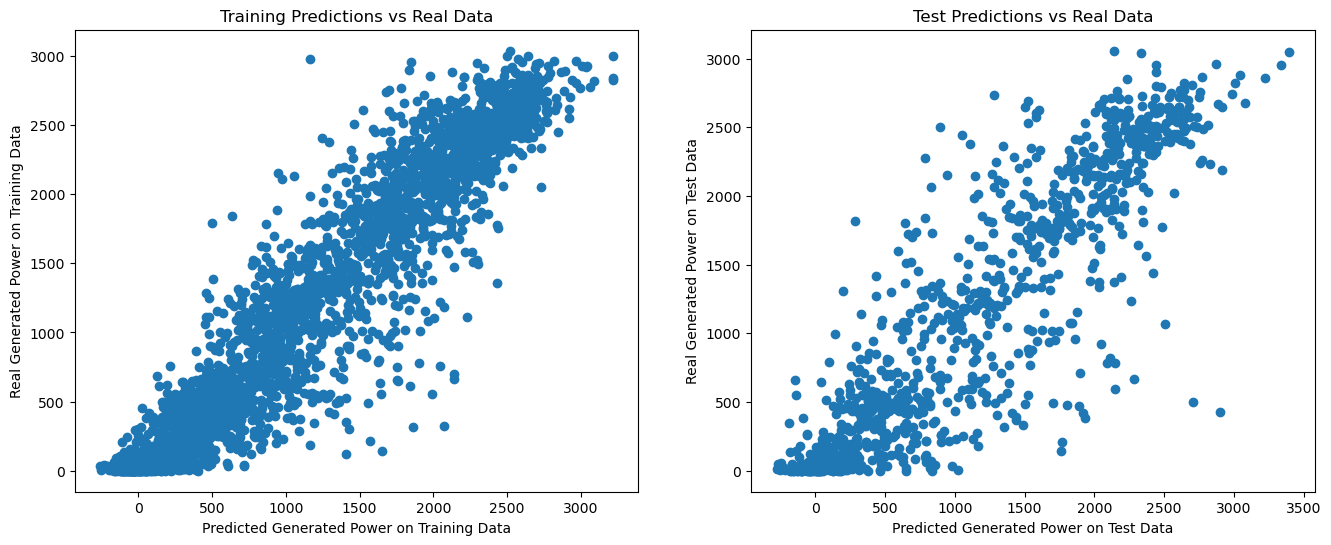

In [33]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

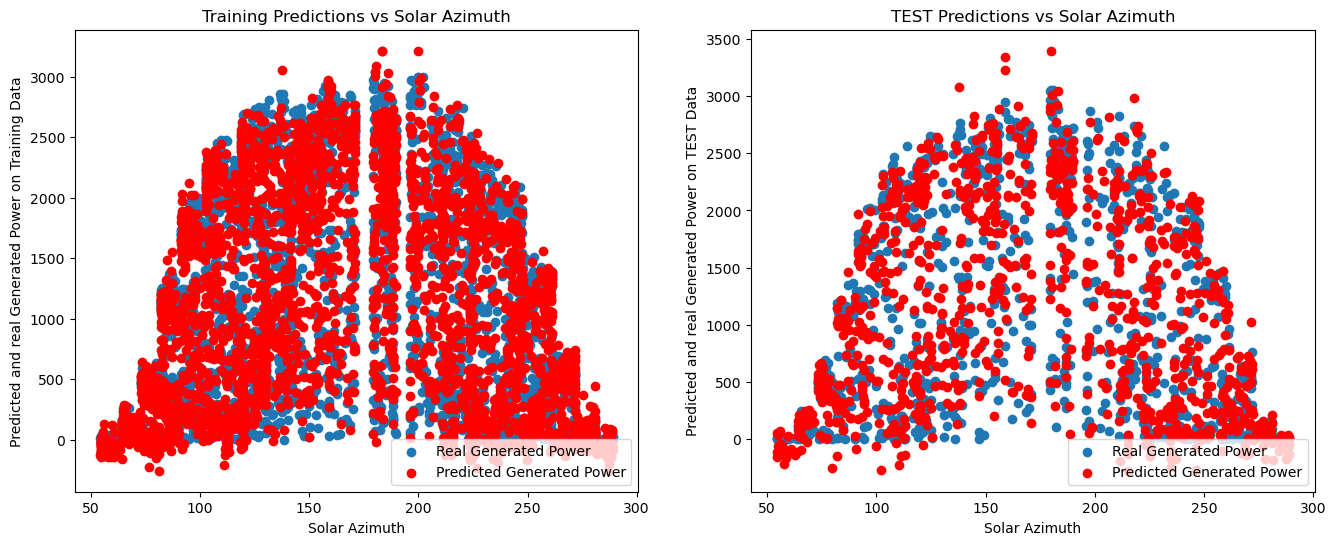

In [34]:
x_axis = sc_X.inverse_transform(X_train)[:,-1]
x2_axis = sc_X.inverse_transform(X_test)[:,-1]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('Solar Azimuth')
plt.title('Training Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('Solar Azimuth')
plt.title('TEST Predictions vs Solar Azimuth')
plt.legend(loc='lower right')
plt.show()

In [35]:
results = np.concatenate((y_test_orig, y_pred_orig), 1)
results = pd.DataFrame(data=results)
results.columns = ['Real Solar Power Produced', 'Predicted Solar Power']
#results = results.sort_values(by=['Real Solar Power Produced'])
pd.options.display.float_format = "{:,.2f}".format
#results[800:820]
results[7:18]

,Real Solar Power Produced,Predicted Solar Power
7,"2,497.53","2,499.79"
8,514.65,500.24
9,916.92,"1,170.62"
10,"1,911.95","2,064.93"
11,35.15,511.27
12,"2,449.04","2,570.27"
13,38.84,861.06
14,823.41,"2,114.47"
15,"2,274.65","2,298.13"
16,"1,123.40","1,296.01"


In [36]:
sc = StandardScaler()
pred_whole = spfnet.predict(sc.fit_transform(X))
pred_whole_orig = sc_y.inverse_transform(pred_whole)
pred_whole_orig

132/132 [==============================] - 0s 3ms/step


array([[ 409.81784 ],
       [1161.9294  ],
       [2138.9302  ],
       ...,
       [  50.752525],
       [ -49.2985  ],
       [  82.00704 ]], dtype=float32)

In [37]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

In [38]:
r2_score(pred_whole_orig, y)

0.8571030661409289

In [39]:
df_results = pd.DataFrame.from_dict({
    'R2 Score of Whole Data Frame': r2_score(pred_whole_orig, y),
    'R2 Score of Training Set': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Test Set': r2_score(y_pred_orig, y_test_orig),
    'Mean of Test Set': np.mean(y_pred_orig),
    'Standard Deviation pf Test Set': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
},orient='index', columns=['Value'])
display(df_results.style.background_gradient(cmap='afmhot', axis=0))

,Value
R2 Score of Whole Data Frame,0.857103
R2 Score of Training Set,0.885590
R2 Score of Test Set,0.770413
Mean of Test Set,1126.993652
Standard Deviation pf Test Set,887.995911
Relative Standard Deviation,0.787933


**OBSERVATIONS**
- High Correlation between Zenith and Agnle of Incidence of 0.71
- Shortwave radiation backwards and Generate Power KW has corr of 0.56
- Relative Humidity and Zenith are +ve corr (0.51)
- Relative Humidity and Low Cloud Cover are + ve correlated (0.49)
- Angle of Incidence and Zenith are -vely correlated with Genarted Power (-0.65)
- -ve corr between Zenith and temperature of -0.55
- High negative corr exists btw Shortwave radiation backwards and Zenith (-.8)
- Shortwave radiation backwards and Relative humidity are -vely correlated (-.72)
- Relative humidity and Temperature are -vely correlated (-.77)
- 


In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [41]:
df = pd.read_csv('solarpowergeneration.csv')
target_column='generated_power_kw'
features = df.drop(target_column, axis=1).values
target = df[target_column].values

In [42]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.reshape(-1, 1))

In [43]:
sequence_length = 10
X, y = [], []
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i+sequence_length, :])
    y.append(target_scaled[i+sequence_length, 0])

X, y = np.array(X), np.array(y)

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
106/106 [==============================] - 4s 17ms/step - loss: 0.1137 - val_loss: 0.0483
Epoch 2/200
106/106 [==============================] - 1s 6ms/step - loss: 0.0465 - val_loss: 0.0405
Epoch 3/200
106/106 [==============================] - 1s 12ms/step - loss: 0.0412 - val_loss: 0.0371
Epoch 4/200
106/106 [==============================] - 1s 14ms/step - loss: 0.0369 - val_loss: 0.0339
Epoch 5/200
106/106 [==============================] - 1s 14ms/step - loss: 0.0339 - val_loss: 0.0311
Epoch 6/200
106/106 [==============================] - 1s 11ms/step - loss: 0.0308 - val_loss: 0.0288
Epoch 7/200
106/106 [==============================] - 1s 8ms/step - loss: 0.0281 - val_loss: 0.0263
Epoch 8/200
106/106 [==============================] - 1s 5ms/step - loss: 0.0266 - val_loss: 0.0264
Epoch 9/200
106/106 [==============================] - 1s 5ms/step - loss: 0.0251 - val_loss: 0.0249
Epoch 10/200
106/106 [==============================] - 1s 5ms/step - loss: 0.0244 - v

Epoch 81/200
106/106 [==============================] - 1s 11ms/step - loss: 0.0071 - val_loss: 0.0154
Epoch 82/200
106/106 [==============================] - 1s 6ms/step - loss: 0.0074 - val_loss: 0.0155
Epoch 83/200
106/106 [==============================] - 1s 6ms/step - loss: 0.0077 - val_loss: 0.0149
Epoch 84/200
106/106 [==============================] - 1s 7ms/step - loss: 0.0076 - val_loss: 0.0156
Epoch 85/200
106/106 [==============================] - 1s 7ms/step - loss: 0.0067 - val_loss: 0.0153
Epoch 86/200
106/106 [==============================] - 1s 8ms/step - loss: 0.0067 - val_loss: 0.0153
Epoch 87/200
106/106 [==============================] - 1s 9ms/step - loss: 0.0070 - val_loss: 0.0158
Epoch 88/200
106/106 [==============================] - 1s 14ms/step - loss: 0.0070 - val_loss: 0.0157
Epoch 89/200
106/106 [==============================] - 1s 14ms/step - loss: 0.0065 - val_loss: 0.0145
Epoch 90/200
106/106 [==============================] - 1s 13ms/step - loss: 0.

106/106 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0147
Epoch 161/200
106/106 [==============================] - 1s 6ms/step - loss: 0.0033 - val_loss: 0.0152
Epoch 162/200
106/106 [==============================] - 1s 6ms/step - loss: 0.0037 - val_loss: 0.0140
Epoch 163/200
106/106 [==============================] - 1s 8ms/step - loss: 0.0034 - val_loss: 0.0145
Epoch 164/200
106/106 [==============================] - 1s 13ms/step - loss: 0.0035 - val_loss: 0.0151
Epoch 165/200
106/106 [==============================] - 1s 11ms/step - loss: 0.0035 - val_loss: 0.0141
Epoch 166/200
106/106 [==============================] - 1s 13ms/step - loss: 0.0034 - val_loss: 0.0143
Epoch 167/200
106/106 [==============================] - 1s 13ms/step - loss: 0.0035 - val_loss: 0.0142
Epoch 168/200
106/106 [==============================] - 1s 13ms/step - loss: 0.0033 - val_loss: 0.0148
Epoch 169/200
106/106 [==============================] - 1s 11ms/step - loss: 0.00

In [47]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Test Loss: {loss}')

27/27 [==============================] - 0s 6ms/step - loss: 0.0147
Model Test Loss: 0.014748715795576572


In [48]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = scaler.inverse_transform(y_pred) # unscale the predictions
y_test_orig = scaler.inverse_transform(y_test.reshape(-1,1)) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

27/27 [==============================] - 0s 3ms/step


371.23011993413047

In [49]:
train_pred = model.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = scaler.inverse_transform(train_pred) # unscale the predictions
y_train_orig = scaler.inverse_transform(y_train.reshape(-1,1)) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

106/106 [==============================] - 0s 3ms/step


150.40618079591331

In [50]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 249.44389365398794


In [51]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 371.23011993413047


In [52]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.8365836714796427

In [53]:
r2_score(train_pred_orig, y_train_orig)

0.9728265433205777

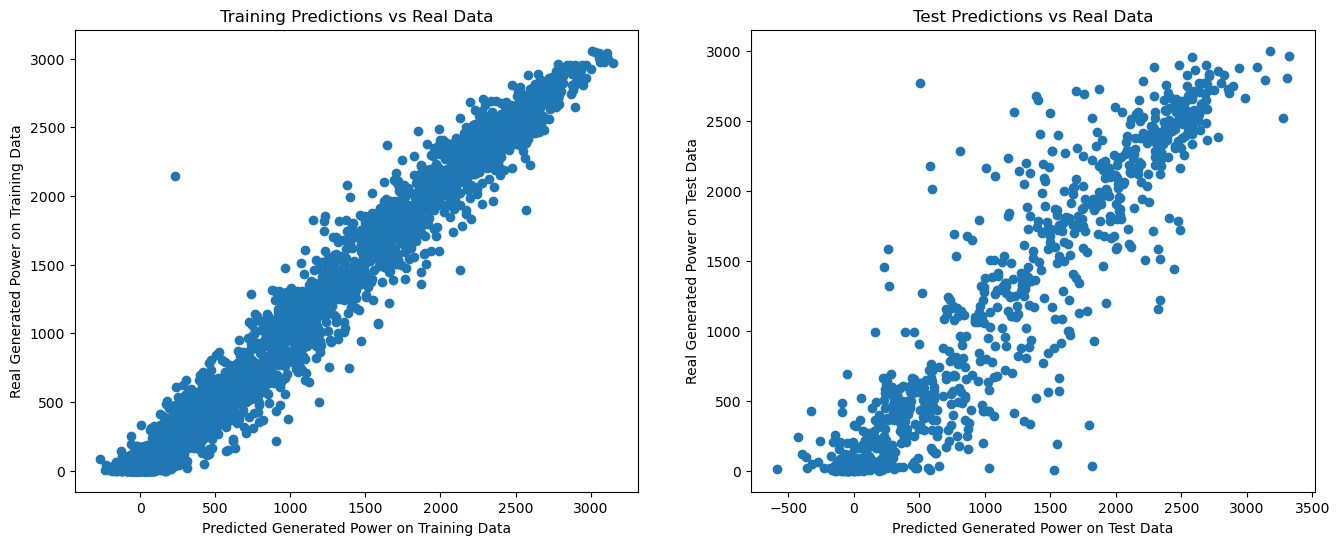

In [54]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

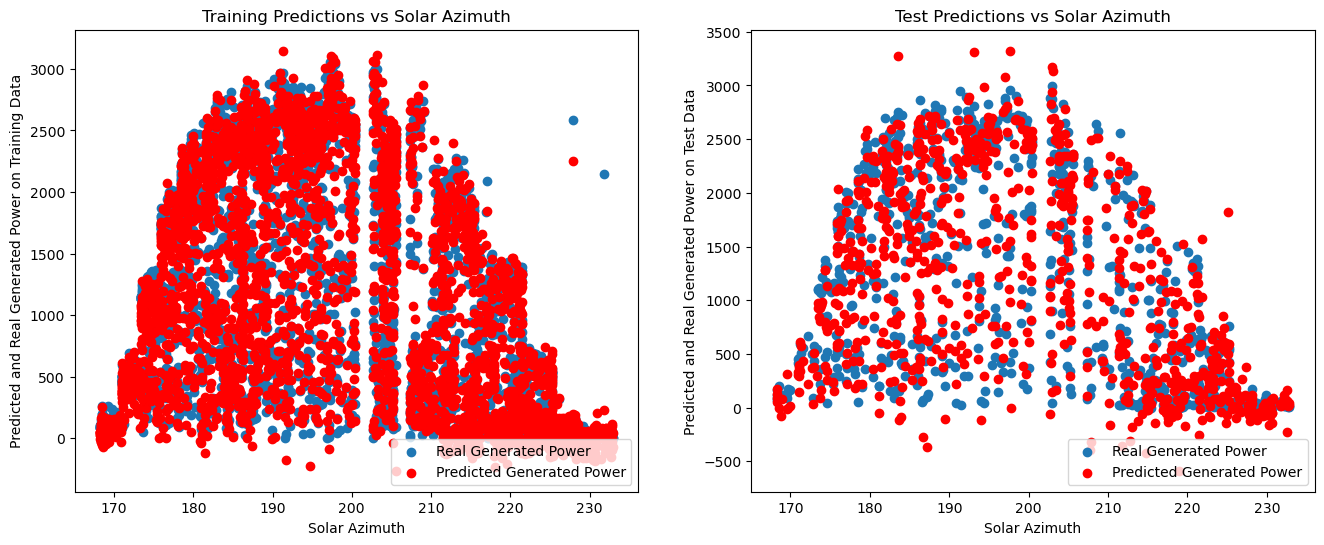

In [55]:
x_axis_train = sc_X.inverse_transform(X_train[:, -1, :])[:, -1]
x_axis_test = sc_X.inverse_transform(X_test[:, -1, :])[:, -1]

plt.figure(figsize=(16, 6))

# Training data scatter plot
plt.subplot(1, 2, 1)
plt.scatter(x_axis_train, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis_train, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and Real Generated Power on Training Data')
plt.xlabel('Solar Azimuth')
plt.title('Training Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

# Testing data scatter plot
plt.subplot(1, 2, 2)
plt.scatter(x_axis_test, y_test_orig, label='Real Generated Power')
plt.scatter(x_axis_test, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and Real Generated Power on Test Data')
plt.xlabel('Solar Azimuth')
plt.title('Test Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

plt.show()

In [56]:
results = np.concatenate((y_test_orig, y_pred_orig), 1)
results = pd.DataFrame(data=results)
results.columns = ['Real Solar Power Produced', 'Predicted Solar Power']
#results = results.sort_values(by=['Real Solar Power Produced'])
pd.options.display.float_format = "{:,.2f}".format
#results[800:820]
results[1:14]

,Real Solar Power Produced,Predicted Solar Power
1,"1,159.14",789.58
2,"1,798.44","2,005.72"
3,"2,196.65","1,313.05"
4,86.92,-102.60
5,380.08,527.58
6,876.92,"1,272.49"
7,"2,464.53","2,268.15"
8,"1,766.89","1,595.91"
9,"2,127.15","1,344.76"
10,359.65,626.26


In [57]:
df_results = pd.DataFrame.from_dict({
    'R2 Score of Training Set': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Test Set': r2_score(y_pred_orig, y_test_orig),
    'Mean of Test Set': np.mean(y_pred_orig),
    'Standard Deviation pf Test Set': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
},orient='index', columns=['Value'])
display(df_results.style.background_gradient(cmap='afmhot', axis=0))

,Value
R2 Score of Training Set,0.972827
R2 Score of Test Set,0.836584
Mean of Test Set,1175.576294
Standard Deviation pf Test Set,918.323059
Relative Standard Deviation,0.781168
